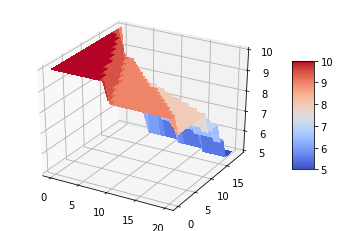

In [6]:
import numpy as np
from typing import Sequence, Tuple
from scipy.stats import poisson
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib import cm

T: int = 20  # time steps
M: int = 20  # initial inventory
# the following are (price, poisson mean) pairs, i.e., elasticity
el: Sequence[Tuple[float, float]] = [
    (10.0, 0.3), (9.0, 0.8), (8.0, 1.6),
    (7.0, 2.7), (6.0, 4.1), (5.0, 7.2)
]

# v represents the Optimal Value Function (time, Inventory) -> E[Sum of Sales Revenue]
v: np.ndarray = np.zeros((T + 1, M + 1))
pi: np.ndarray = np.zeros((T, M + 1))
rvs: Sequence = [poisson(l) for _, l in el]

for t in range(T - 1, -1, -1):
    for s in range(M + 1):
        q_vals = [sum(rvs[i].pmf(d) * (d * p + v[t + 1, s - d])
                    for d in range(s)) +
                (1. - rvs[i].cdf(s - 1)) * s * p
                for i, (p, _) in enumerate(el)]
        v[t, s] = np.max(q_vals)
        pi[t, s] = el[int(np.argmax(q_vals))][0]


x, y = np.meshgrid(range(M + 1), range(T))
fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(x, y, pi, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()